In [1]:
import pandas as pd

pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,normal
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,normal
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,normal
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,normal
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,normal
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,normal


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality label           0
dtype: int64

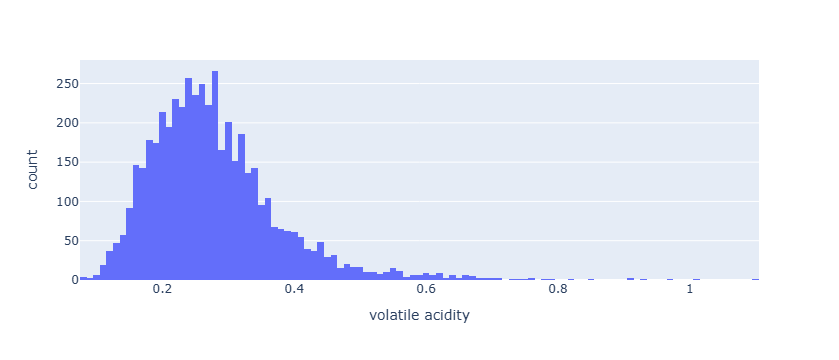

In [15]:
df.plot(kind='hist', x='volatile acidity')

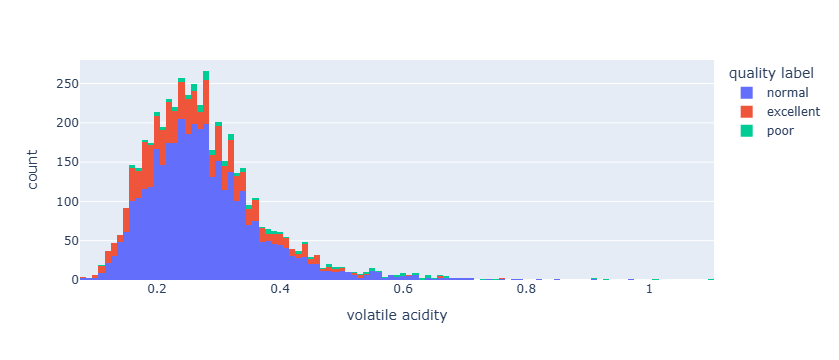

In [16]:
df.plot(kind='hist', x='volatile acidity', color='quality label')

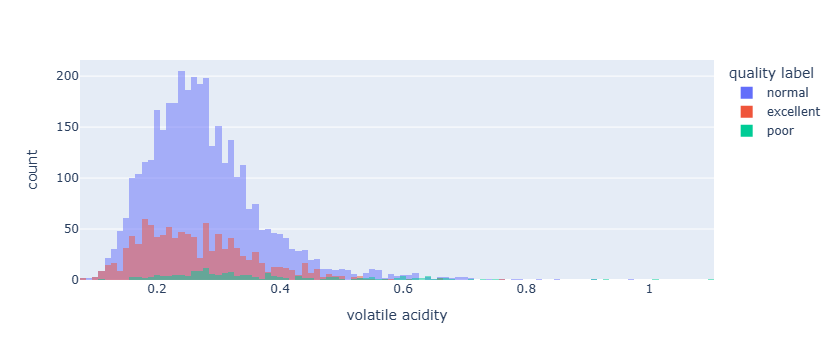

In [17]:
df.plot(kind='hist', x='volatile acidity', color='quality label', barmode='overlay')

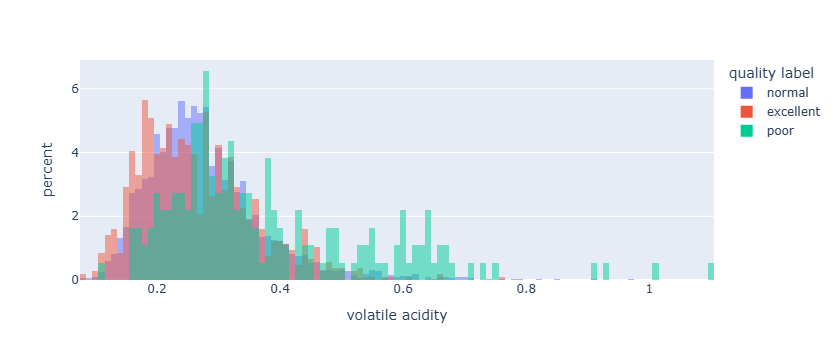

In [18]:
df.plot(kind='hist', x='volatile acidity', color='quality label', barmode='overlay', histnorm='percent')

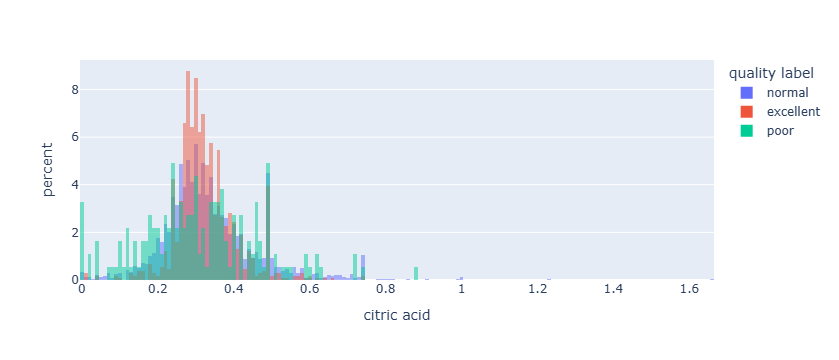

In [19]:
df.plot(kind='hist', x='citric acid', color='quality label', barmode='overlay', histnorm='percent')

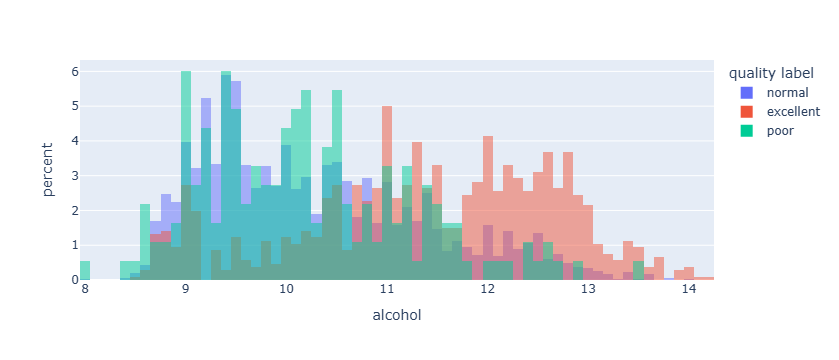

In [20]:
df.plot(kind='hist', x='alcohol', color='quality label', barmode='overlay', histnorm='percent')

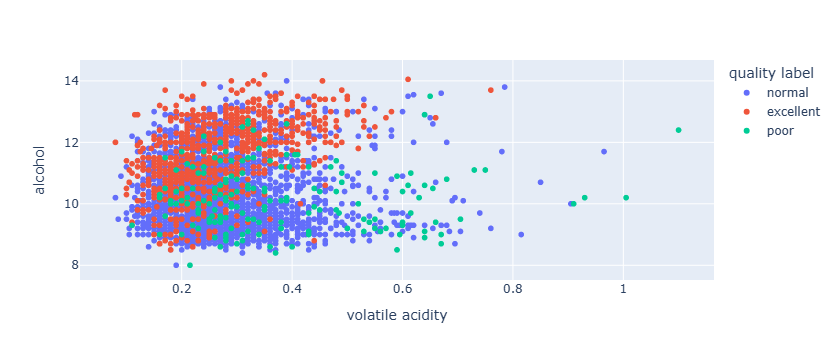

In [22]:
df.plot(kind='scatter', x = 'volatile acidity', y = 'alcohol', color = 'quality label')

In [23]:
X = df.drop(columns=['quality label'])
y = df['quality label']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345, stratify=y)

In [29]:
y.value_counts(normalize=True)

quality label
normal       0.746223
excellent    0.216415
poor         0.037362
Name: proportion, dtype: float64

In [30]:
y_train.value_counts(normalize=True)

quality label
normal       0.746299
excellent    0.216437
poor         0.037264
Name: proportion, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

quality label
normal       0.745918
excellent    0.216327
poor         0.037755
Name: proportion, dtype: float64

In [32]:
df_train = X_train.copy()
df_train['quality label'] = y_train

In [35]:
df_test = X_test.copy()
df_test['quality label'] = '?'

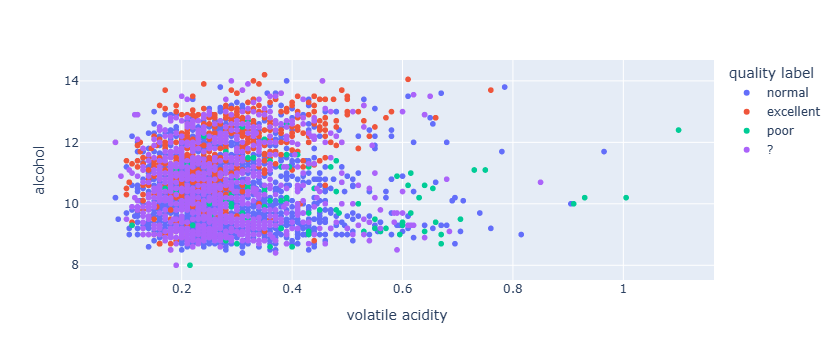

In [37]:
pd.concat([df_train, df_test], ignore_index=True).plot(kind='scatter', x = 'volatile acidity', y = 'alcohol', color = 'quality label')

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
sum(knn.predict(X_test) == y_test) / len(y_test)

0.736734693877551

In [51]:
scores = pd.DataFrame(data = [i for i in range(2, 100)], columns=['score'], index=range(2, 100))

In [59]:
scores['score'] = scores['score'].apply(lambda i : KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).score(X_test, y_test))

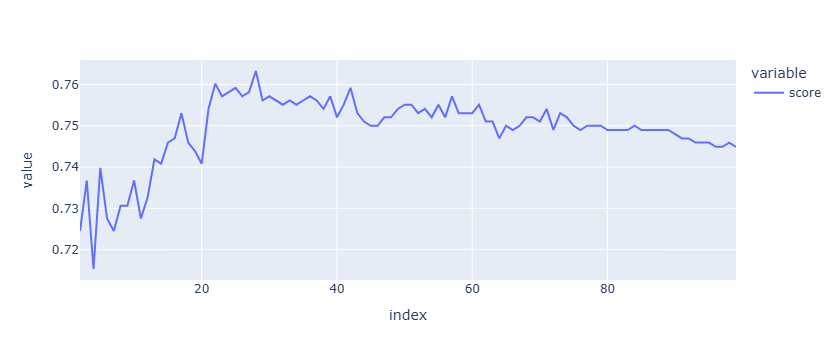

In [60]:
scores.plot()

In [61]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)

In [62]:
cv_scores = cross_val_score(knn, X, y, cv=skf)

In [63]:
cv_scores

array([0.7377551 , 0.7255102 , 0.73979592, 0.72931563, 0.75280899])

In [64]:
cv_scores.mean()

np.float64(0.7370371682891748)

In [72]:
scores = pd.DataFrame(data = [i for i in range(2, 300)], columns=['score'], index=range(2, 300))
scores['score'] = scores['score'].apply(lambda i : cross_val_score(KNeighborsClassifier(n_neighbors=i), X, y, cv=skf).mean())

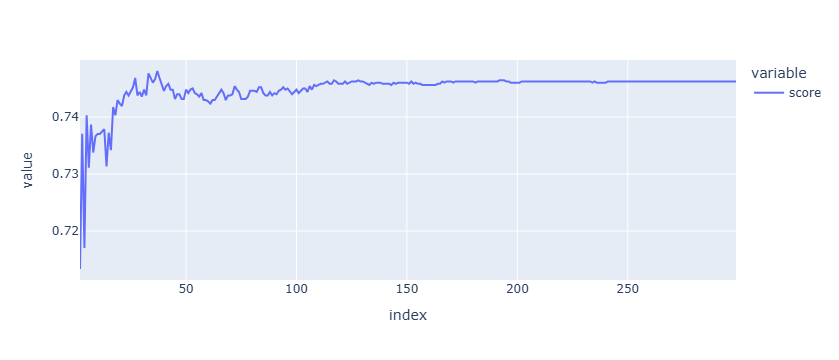

In [73]:
scores.plot()